<a href="https://colab.research.google.com/github/ZainDataS/EDA_Global_terrorism/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -** **Global Terrorism Analysis**

**Project Type** - EDA

**Contribution** - ZAIN ADIL

# **Project Summary -**

 The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Explore and analyze the data to discover key findings pertaining to terrorist activities.

# **GitHub Link -**

# **Problem Statement**

#### **Define Your Business Objective?**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


# **Let's Begin !**

**Basic Overview**

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing and Observing the Data**

In [3]:
file_path = '/content/drive/My Drive/AlmaBetter/CapstoneProject/EDA on Global Terrorism/Global Terrorism Data.csv'


The data string is of latin encoding instead of UTF-8 encoding.

In [4]:
#reference - https://docs.python.org/3/library/codecs.html#standard-encodings
raw_data2 = pd.read_csv(file_path, encoding="ISO-8859–1")
print('Data successfully imported')
raw_data = raw_data2.copy()  #keeping the original copy separately

<ipython-input-4-613e376c366c>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data2 = pd.read_csv(file_path, encoding="ISO-8859–1")


Data successfully imported


In [5]:
raw_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
raw_data.shape

(181691, 135)

In [8]:
raw_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## **Cleaning the Data**

In [9]:
#viewing all the columns name so that only useful columns can be kept for further analysis
for i in raw_data.columns:
  print(i,end=',')


eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

In [10]:
#making a dataset with only the useful columns and dropping the remaining columns
removed_col_df= raw_data[['iyear','imonth','iday','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','natlty1_txt','gname','weapdetail','nkill','nwound','propextent_txt']]

In [11]:
removed_col_df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weapdetail,nkill,nwound,propextent_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,NaN,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,NaN,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,United States,Unknown,NaN,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosive,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,NaN,NaN,NaN


In [12]:
#renaming the columns
renamed_df=removed_col_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','targtype1_txt':'TargetType','natlty1_txt':'Nationality','gname':'Group Name','weaptype1_txt':'Weapon Type','nkill':'Killed','nwound':'Wounded','propextent_txt':'PropertyDamaged'})

In [13]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   AttackType       181691 non-null  object 
 8   TargetType       181691 non-null  object 
 9   Nationality      180132 non-null  object 
 10  Group Name       181691 non-null  object 
 11  weapdetail       114021 non-null  object 
 12  Killed           171378 non-null  float64
 13  Wounded          165380 non-null  float64
 14  PropertyDamaged  64065 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 20.8+ MB


In [14]:
renamed_df.shape

(181691, 15)

**Replacing the Null value in 'Killed' and 'Wounded' and 'PropertyDamaged' column with 0(Zero).**

In [15]:
renamed_df['Killed'].fillna('0',inplace=True)
renamed_df['Killed'].isnull().sum()

0

In [16]:
renamed_df['Wounded'].fillna('0',inplace=True)
renamed_df['Wounded'].isnull().sum()

0

In [17]:
renamed_df['PropertyDamaged'].fillna('0',inplace=True)
renamed_df['PropertyDamaged']= renamed_df['PropertyDamaged'].replace({'Unknown':0})
renamed_df['PropertyDamaged'].isnull().sum()

0

In [18]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             181691 non-null  int64 
 1   Month            181691 non-null  int64 
 2   Day              181691 non-null  int64 
 3   Country          181691 non-null  object
 4   Region           181691 non-null  object
 5   provstate        181270 non-null  object
 6   city             181257 non-null  object
 7   AttackType       181691 non-null  object
 8   TargetType       181691 non-null  object
 9   Nationality      180132 non-null  object
 10  Group Name       181691 non-null  object
 11  weapdetail       114021 non-null  object
 12  Killed           181691 non-null  object
 13  Wounded          181691 non-null  object
 14  PropertyDamaged  181691 non-null  object
dtypes: int64(3), object(12)
memory usage: 20.8+ MB


In [19]:
#converting the NaN replaced column to int datatype
renamed_df= renamed_df.astype({'Killed':int,'Wounded':int})

In [20]:
#checking the no of total null values present in different columns
df=renamed_df
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
provstate            421
city                 434
AttackType             0
TargetType             0
Nationality         1559
Group Name             0
weapdetail         67670
Killed                 0
Wounded                0
PropertyDamaged        0
dtype: int64

In [21]:
#creating a new col for total casualties by summing no of killed and no of wounded
df['Casualties']= df['Killed']+df['Wounded']

In [22]:
df.describe()

,Year,Month,Day,Killed,Wounded,Casualties
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883291,5.150151
std,13.259430,3.388303,8.814045,11.227057,34.309746,40.555414
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


## **Observations from above Table:**
1. This dataset contains terrorist activities ranging from 1970 to 2017.

2. The maximum number of people killed in a single attack is 1570.

3. The maximum number of people wounded in a single attack is 8191.

4. The highest casualties in a single attack is 9574.

5. An average of more than 2 people were killed in each attack.

6. Similarly an average of approx 3 people got wounded in each attack.






In [23]:
df.head()

,Year,Month,Day,Country,Region,provstate,city,AttackType,TargetType,Nationality,Group Name,weapdetail,Killed,Wounded,PropertyDamaged,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,NaN,1,0,0,1
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,NaN,0,0,0,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,United States,Unknown,NaN,1,0,0,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosive,0,0,0,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,0,0,0,0


### No of attacks Region, Country and City wise.

# **Visualizing the Data**

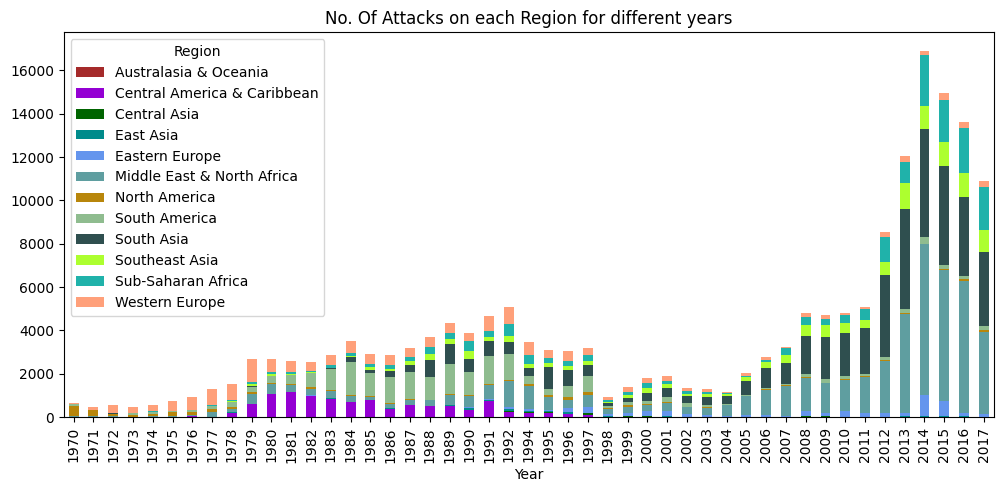

In [32]:
# pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(12,5))
# plt.title('No. Of Attacks by each Region for different years')
# plt.ylabel('No Of Attacks')
df.groupby(['Year','Region']).size().unstack().plot(kind='bar',stacked=True,color=['Brown','#9400D3','#006400','#008B8B','#6495ED','#5F9EA0','#B8860B','#8FBC8F','#2F4F4F','#ADFF2F','#20B2AA','#FFA07A'],figsize=(12,5),title='No. Of Attacks on each Region for different years')
plt.show()

In [30]:
# ##ARRANGE BOTH COUNTRY AND CITY BAR CHART IN ONE PLACE WITH TWO SEPARATE GRAPH SIDE BY SIDE
# fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
# country_df = df.loc[:,'Country'].value_counts().to_frame().rename(columns={'Country':'No Of Incidents'})
# plt.subplot(211)
# plt.plot(country_df.head(10),kind='bar')
# plt.subplot(212)
# plt.plot(city_df.head(10),kind='bar')
# plt.show()

In [ ]:
#Which city has the highest attack
city_df= df['city'][df['city']!='Unknown'].value_counts().to_frame()
city_df.head(10).plot(kind='bar')

In [ ]:
year_df = df['Year'].value_counts(sort=True).to_frame().reset_index().rename(columns={'index':'Year','Year':'No Of Attacks'}).set_index('Year')
year_df.head(10)

In [ ]:
year_df.tail(10).plot(kind='bar')

In [ ]:
df['AttackType'].value_counts().to_frame()

Observations from above Table:

In [ ]:
df['Nationality'].value_counts().head(10).to_frame()

In [ ]:
df['Group Name'][df['Group Name']!='Unknown'].value_counts().head(10).to_frame()

In [ ]:
df[['Group Name','Killed','Country']][df['Killed']== df['Killed'].max()]

In [ ]:
df.drop([73126],inplace=True)

In [ ]:
df[['Group Name','Casualties','Country']][df['Casualties']== df['Casualties'].max()]

•	which region, country ,city has the highest atack
•	which year has highest and lowest atack
•	what types of attack were carried mostly
•	which nationality people were the most casualties
•	which group has highest no of atacks
•	which group has highest kill in which country
•	which group has highest casualties in which country
•	which attack had most property damages
* which type of target was mostly attacked
* what type of weapon were mostly used





In [ ]:
df['PropertyDamaged'].value_counts().to_frame()

In [ ]:
catas_df = df[['Year','Country','city','AttackType','Group Name','PropertyDamaged','Casualties']][df['PropertyDamaged']== 'Catastrophic (likely >= $1 billion)']
catas_df

In [ ]:
df['TargetType'][df['TargetType']!='Unknown'].value_counts().head(10).to_frame()

In [ ]:
df['Weapon Type'][df['Weapon Type']!='Unknown'].value_counts().head(10).to_frame()

# **Conclusion**